In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=28*28))
model.add(Dense(10, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout

# Create model
model = Sequential()

# Hidden layer
model.add(Dense(
    units=16, activation=activations.relu, input_dim=28*28,
    kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))
  
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(
    units=10, activation=activations.softmax,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))
          

# Print network summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [40]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [41]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

print('Train:', X_train.shape, y_train.shape) # (60000, 28, 28) (60000,)
print('Test:', X_test.shape, y_test.shape) # (10000, 28, 28) (10000,)


Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [42]:
from sklearn.preprocessing import StandardScaler

# Rescale train and validation data
scaler = StandardScaler()
X_train_preprocessed = scaler.fit_transform(X_train.reshape([-1, 784]).astype(float))
X_test_preprocessed = scaler.transform(X_test.reshape([-1, 784]).astype(float))

print('Train:', X_train_preprocessed.shape) # (60000, 784)
print('Test:', X_test_preprocessed.shape) # (10000, 784)

Train: (60000, 784)
Test: (10000, 784)


In [43]:
# Fit model
history = model.fit(
    x=X_train_preprocessed, y=y_train,
    validation_split=0.2, batch_size=128, epochs=30,
    shuffle=True # Shuffle training samples
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 31us/step - loss: 1.6821 - acc: 0.4364 - val_loss: 0.8324 - val_acc: 0.8294
Epoch 2/30
48000/48000 [==============================] - 1s 19us/step - loss: 1.1993 - acc: 0.6050 - val_loss: 0.6356 - val_acc: 0.8641
Epoch 3/30
48000/48000 [==============================] - 1s 19us/step - loss: 1.0882 - acc: 0.6395 - val_loss: 0.5595 - val_acc: 0.8814
Epoch 4/30
48000/48000 [==============================] - 1s 20us/step - loss: 1.0208 - acc: 0.6653 - val_loss: 0.5108 - val_acc: 0.8869
Epoch 5/30
48000/48000 [==============================] - 1s 20us/step - loss: 0.9749 - acc: 0.6794 - val_loss: 0.4811 - val_acc: 0.8923
Epoch 6/30
48000/48000 [==============================] - 1s 20us/step - loss: 0.9548 - acc: 0.6868 - val_loss: 0.4662 - val_acc: 0.8950
Epoch 7/30
48000/48000 [==============================] - 1s 19us/step - loss: 0.9340 - acc: 0.6920 - val_loss: 0.4544 - val_acc

In [44]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

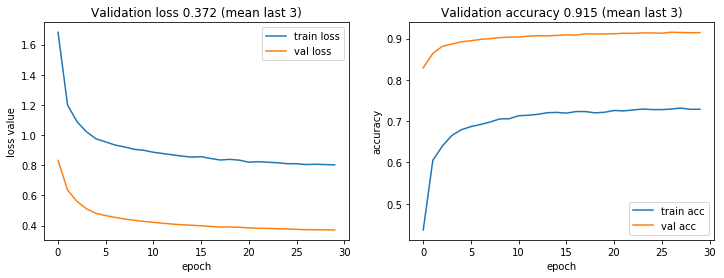

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [46]:
(test_loss, test_accuracy) = model.evaluate(X_test_preprocessed, y_test, batch_size=16)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%

10000/10000 [==============================] - 0s 41us/step
Test loss: 0.38
Test accuracy: 91.36%


In [47]:
model.layers

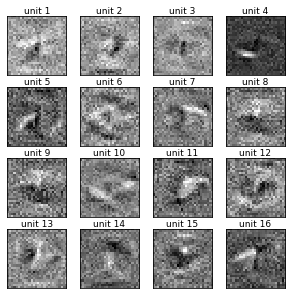

In [48]:
# Retrieve first hidden layer
hidden = model.layers[0]

# Get weights/biases
weights_hidden, biases_hidden = hidden.get_weights()

# Create figure with 16 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(5, 5))

# Plot the weights of the 16 hidden units
for i, axis in enumerate(axes.flatten()):
    # Get weights of i-th hidden unit
    weights = weights_hidden[:, i]

    # Reshape into 28 by 28 array
    weights = weights.reshape(28, 28)

    # Plot weights
    axis.set_title('unit {}'.format(i+1), size=9, pad=2)
    axis.imshow(weights, cmap=plt.cm.gray_r) # Grayscale
    axis.get_xaxis().set_visible(False) # Disable x-axis
    axis.get_yaxis().set_visible(False) # Disable y-axis

plt.show()